## error_pos_plotter.ipynb

Jupyter notebook whose aim is to plot the position error for each individual electrode. Based on logs after ICP post-processing.

Author: Kieran Le Mouël

Date: 07/07/2025

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
import scipy.stats
import matplotlib.patches as mpatches
import random

In [2]:
# path_NAS = "/home/klemouel/NAS_EMPENN/share/users/klemouel/Stage/"
path_NAS = 'C:\\Users\\kiera\\Documents\\Unlimited_Home_Works\\Internship2025\\data\\'
path_proc = path_NAS + "post_processing\\T1_65\\pos_errors\\"
path_trans = path_NAS + 'trans\\'
path_CSV = path_NAS + "Correspondancies_ElectrodeDetection_Dataset.csv"

In [3]:
corr = pd.read_csv(path_CSV) # Reading the CSV
database = [] # Initialize empty list that will contain the read logging data
database_brainstorm = []

In [4]:
electrodes = {
    1: "FP2", 2: "FPZ", 3: "FP1", 4: "AF7", 5: "AF3", 6: "AFZ", 7: "AF4", 8: "AF8", 9: "F8", 10: "F6",
    11: "F4", 12: "F2", 13: "FZ", 14: "F1", 15: "F3", 16: "F5", 17: "F7", 18: "FT9", 19: "FT7", 20: "FC5",
    21: "FC3", 22: "FC1", 23: "FCZ", 24: "FC2", 25: "FC4", 26: "FC6", 27: "FT8", 28: "FT10", 29: "T8", 30: "C6",
    31: "C4", 32: "C2", 33: "CZ", 34: "C1", 35: "C3", 36: "C5", 37: "T7", 38: "TP9", 39: "TP7", 40: "CP5",
    41: "CP3", 42: "CP1", 43: "CPZ", 44: "CP2", 45: "CP4", 46: "CP6", 47: "TP8", 48: "TP10", 49: "P8", 50: "P6",
    51: "P4", 52: "P2", 53: "PZ", 54: "P1", 55: "P3", 56: "P5", 57: "P7", 58: "PO7", 59: "PO3", 60: "POZ",
    61: "PO4", 62: "PO8", 63: "O2", 64: "OZ", 65: "O1"
} # Dictionnary to associate case number with electrode name

test_set = [
    "003", "004", "007", "008", "011", "012", "023", "024", "025", "029",
    "030", "031", "036", "037", "038", "039", "040", "059", "060"
]

In [5]:
def load_all_data(l: list[str], path: str) -> None:
    """
    Function used to load all logging data into a list. Data loaded as a string.

    Keyword argument:

    l -- list of strings used to store loaded data

    path -- path to data to load
    """
    for i, row in corr.iterrows():
        if(row['Set'] == "test"):
            id = str(row['Id'])
            id = id.rjust(3,'0')

            with open(path + id +"_err.txt", 'r') as f:
                data = f.read()
                l.append(data)

load_all_data(database, path_proc)

In [6]:
def get_err_values(data: str) -> list:
    """
    Function used to get float error values from loaded data string.

    Keyword argument:

    data -- loaded data string
    """
    tmp = data.split("\n")
    tmp.pop(-1)
    l = []
    for i in tmp:
        haha = i.split(" ")
        l.append(float(haha[1]))
    return l

In [7]:
def get_values_dict(data: str) -> dict:
    """
    Function used to get dictionary matching case number with float error value.

    Keyword argument:

    data -- loaded data string
    """
    tmp = data.split("\n")
    tmp.pop(-1)
    d = {}
    for i in tmp:
        hehe = i.split(" ")
        d[float(hehe[0])] = float(hehe[1])
    return d

In [8]:
def avg(li: list[float]) -> float:
    """
    Function used to get the average value of a list of numerical values

    Keyword argument:

    li -- list to average
    """
    res = 0
    for i in range(0, len(li)):
        res += li[i]
    return res/len(li)

In [9]:
def std(li: list[float]) -> float:
    """
    Function used to compute the standard deviation of a list of numerical values

    Keyword arguments:

    li -- list of values
    """
    res = 0
    mean = avg(li)
    for val in li:
        res += np.power((val - mean),2)
    return sqrt(res)

In [10]:
def count_average(l: list[str]) -> float:
    """
    Function used to get the overall average of a list of loaded data.

    Keyword argument:

    l -- list of loaded data strings
    """
    res = 0
    for data in l:
        res += avg(get_err_values(data))
    return res/len(l)

In [11]:
def smooth(scalars: list[float], weight: float) -> list[float]:
    """
    Smoothing function using the Exponential moving average.

    Keywords arguments:
    
    scalars -- list of floats to be smoothed

    weight -- float value that handles smoothing aggressiveness
    """
    last = scalars[0]
    smoothed = list()
    for point in scalars:
        smoothed_val = last * weight + (1-weight) * point
        smoothed.append(smoothed_val)
        last = smoothed_val
    return smoothed

In [12]:
l = [] # List of average error values
stds = []
vals = [] # List of lists containing error values
def __main__():
    sorted_list = []
    for data in database:
        d = get_values_dict(data)
        sorted_list = sorted(d)
        tmp = []
        for i in sorted_list:
            tmp.append(d[i])
        l.append(tmp)
        stds.append(np.std(tmp))
        vals.append(tmp)
    # print(vals)
    
    # for m in range(0, len(sorted_list)):
    #     res = []
    #     for n in range(0, len(vals)):
    #         res.append(vals[n][m])
    #     l.append(res)
    # return None

__main__()

print(np.std(l))

1.804538481713028


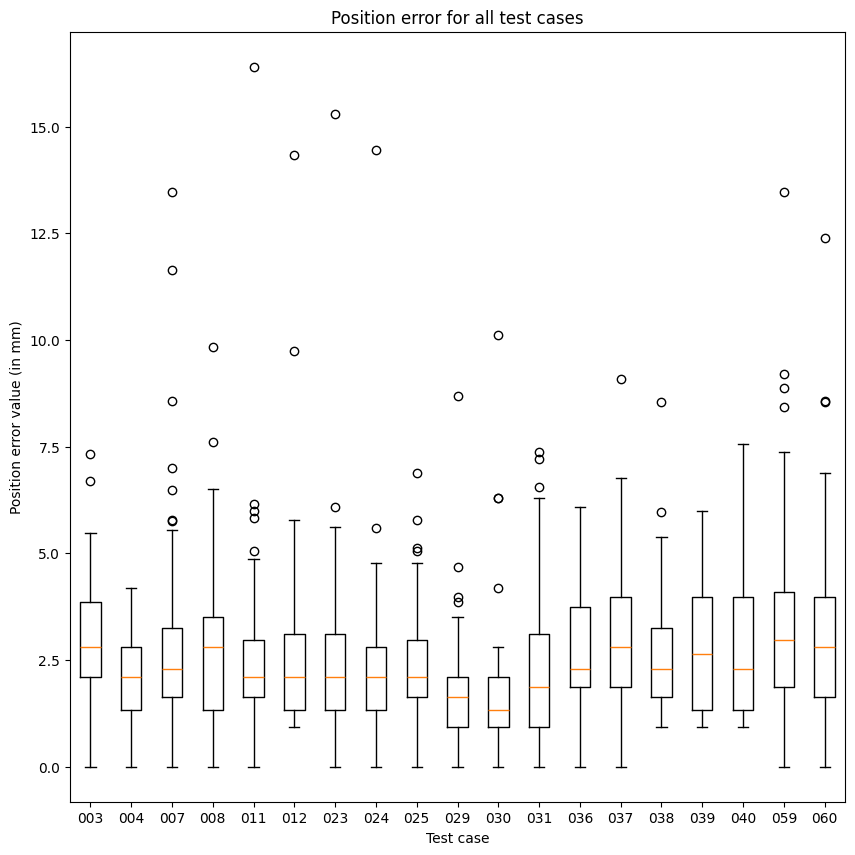

In [13]:
# Plot average error values for the 19 test cases
fig, ax = plt.subplots(1,1,figsize=(10,10))
x = np.arange(1,20,1)
ax.boxplot(l)
ax.set_title("Position error for all test cases")
ax.set_xlabel("Test case")
ax.set_ylabel("Position error value (in mm)")
ax.set_xticks(np.arange(1,20,1));
plt.xticks(np.arange(1,20,1), test_set);
# x = 0
# y = 0
# for i in range(0,65):
#     res = []
#     for j in range(0,len(l[i])):
#         res.append(l[i][j])
#     # p = smooth(res, 0.9)
    # x += 1
    # if (i+1)%5 == 0:
    #     x = 0
    # if x == 0:
    #     y += 1

In [14]:
electrodes = [
    "FP2", "FPZ", "FP1", "AF7", "AF3", "AFZ", "AF4", "AF8", "F8", "F6",
    "F4", "F2", "FZ", "F1", "F3", "F5", "F7", "FT9", "FT7", "FC5",
    "FC3", "FC1", "FCZ", "FC2", "FC4", "FC6", "FT8", "FT10", "T8", "C6",
    "C4", "C2", "CZ", "C1", "C3", "C5", "T7", "TP9", "TP7", "CP5",
    "CP3", "CP1", "CPZ", "CP2", "CP4", "CP6", "TP8", "TP10", "P8", "P6",
    "P4", "P2", "PZ", "P1", "P3", "P5", "P7", "PO7", "PO3", "POZ",
    "PO4", "PO8", "O2", "OZ", "O1"
] # Dictionary matching case number with electrode name

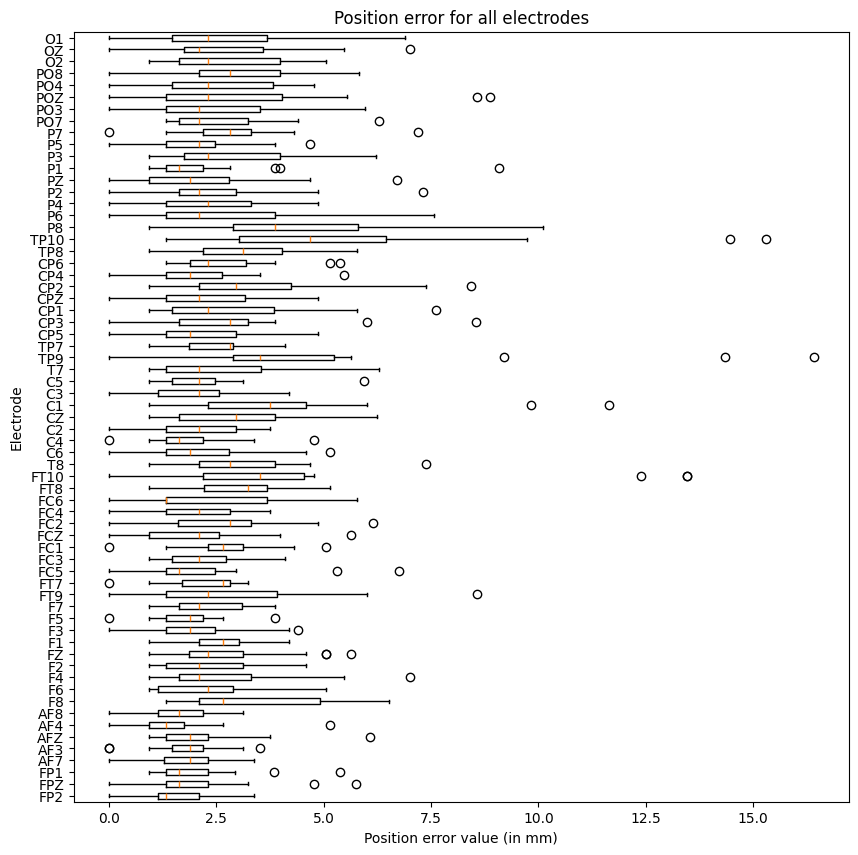

In [15]:
# Plot error values for each electrode for the 19 test cases
fig, ax = plt.subplots(1,1,figsize=(10,10))
x = 0
y = 0
reses = []
for i in range(0,65):
    res = []
    for j in range(0,19):
        res.append(l[j][i])
    reses.append(res)
# je crois que la ligne au dessus indique que les données ne suivent pas une loi normale
ax.boxplot(reses, vert=False);
ax.set_title("Position error for all electrodes")
ax.set_ylabel("Electrode")
ax.set_xlabel("Position error value (in mm)")
plt.yticks(np.arange(1,66,1), electrodes);


In [16]:
def load_all_data_2(l: list[str], path: str) -> None:
    """
    Function used to load all logging data into a list. Data loaded as a string.

    Keyword argument:

    l -- list of strings used to store loaded data

    path -- path to data to load
    """
    for i, row in corr.iterrows():
        if(row['Set'] == "test"):
            id = str(row['Id'])
            id = id.rjust(3,'0')

            with open(path + id +"_err.txt", 'r') as f:
                data = f.read()
                l.append(data)

In [17]:
def get_err_values_2(data: str) -> list:
    """
    Function used to get float error values from loaded data string.

    Keyword argument:

    data -- loaded data string
    """
    tmp = data.split("\n")
    tmp.pop(-1)
    l = []
    for i in tmp:
        l.append(float(i))
    return l

In [18]:
def get_values_dict_2(data: str) -> dict:
    """
    Function used to get dictionary matching case number with float error value.

    Keyword argument:

    data -- loaded data string
    """
    tmp = data.split("\n")
    tmp.pop(-1)
    d = {}
    for i in tmp:
        hehe = i.split(" ")
        d[float(hehe[0])] = float(hehe[1])
    return d

In [19]:
path_brainstorm = path_NAS + "post_processing\\T1_65\\brainstorm_err\\"
database_brainstorm = []
load_all_data_2(database_brainstorm, path_brainstorm)

print(len(database_brainstorm))

19


In [42]:
l2 = [] # List of average error values
std2s = []
val2s = [] # List of lists containing error values
def __main2__():
    sorted_list = []
    for data in database_brainstorm:
        d = get_values_dict_2(data)
        sorted_list = sorted(d)
        tmp = []
        for i in range(1,66):
            if float(i) not in sorted_list:
                tmp.append(d[float(random.choice(sorted_list))])
                # c = 1
            else:
                tmp.append(d[float(i)])
        l2.append(tmp)
        std2s.append(np.std(tmp))
        val2s.append(tmp)
__main2__()

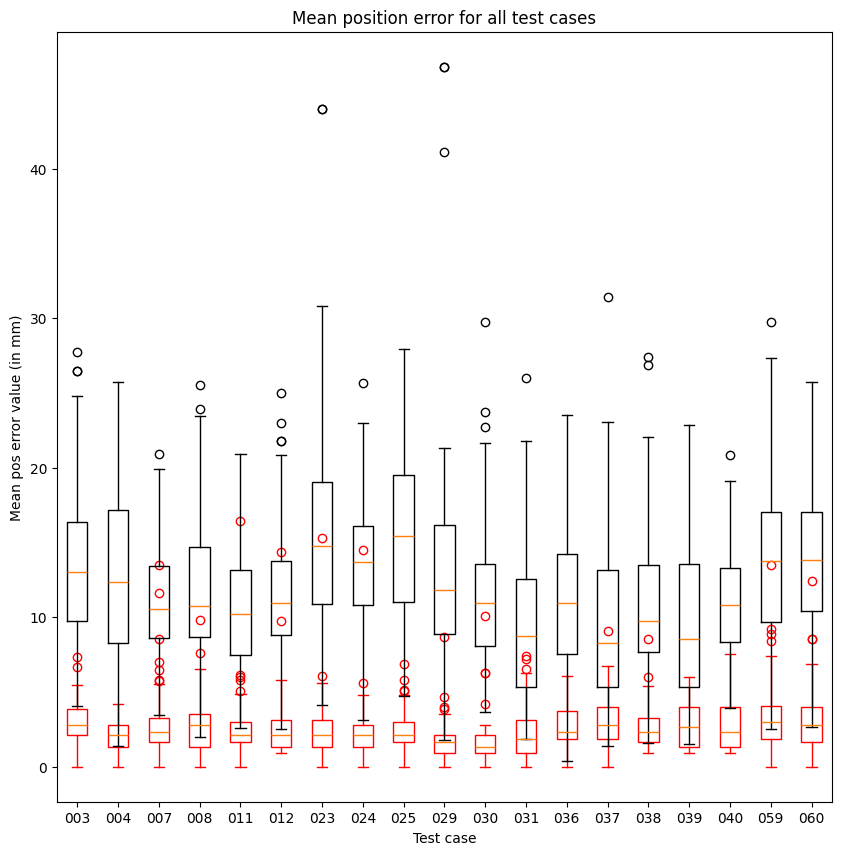

In [43]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
x2 = np.arange(1,20,1)
x = np.arange(1,20,1)
ax.boxplot(l, patch_artist=True,
           boxprops=dict(facecolor="white", color="red"),
           capprops=dict(color="red"),
           whiskerprops=dict(color="red"),
           flierprops=dict(color="red", markeredgecolor="red"))
ax.boxplot(l2)
# ax.errorbar(x2, l2, stds2, marker='o')
# ax.errorbar(x, l, stds, marker='*')
ax.set_title("Mean position error for all test cases")
ax.set_xlabel("Test case")
ax.set_ylabel("Mean pos error value (in mm)")
ax.set_xticks(np.arange(1,20,1));
plt.xticks(np.arange(1,20,1), test_set);

In [ ]:
print(len(l2[0]))

65


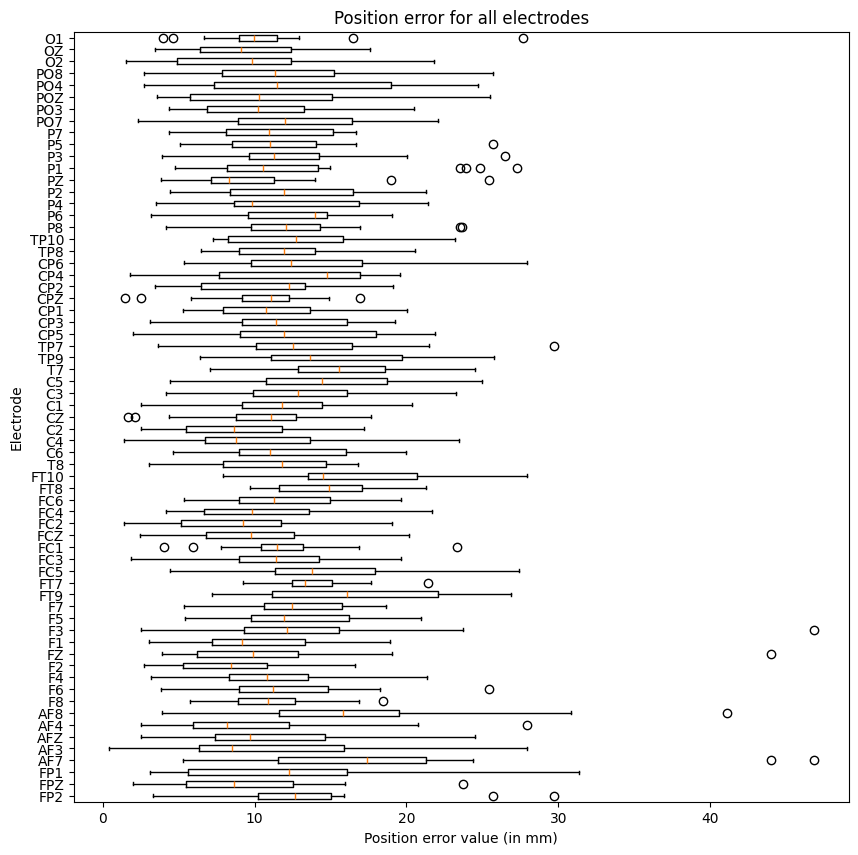

In [44]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
x = 0
y = 0
reses = []
for i in range(0,65):
    res = []
    for j in range(0,19):
        res.append(l2[j][i])
    reses.append(res)
# je crois que la ligne au dessus indique que les données ne suivent pas une loi normale
ax.boxplot(reses, vert=False);
ax.set_title("Position error for all electrodes")
ax.set_ylabel("Electrode")
ax.set_xlabel("Position error value (in mm)")
plt.yticks(np.arange(1,66,1), electrodes);